![](https://www.santander.co.uk/themes/custom/santander_web18/logo.svg)

[image-source](https://www.santander.co.uk/themes/custom/santander_web18/logo.svg)



## Main outline

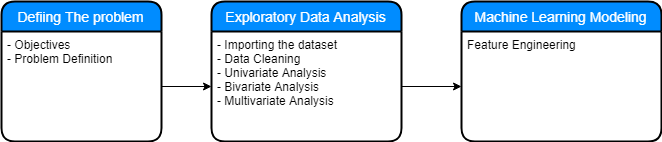

## Exploratory Data Analysis

### Importing the dataset

In [40]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

import matplotlib.pyplot as plt

import gc

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [41]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/sample_submission.csv')

In [42]:
train.shape, test.shape, sub.shape

((200000, 202), (200000, 201), (200000, 2))

In [43]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

At first glance we have many uncharacterized numerical features, their names has the prefix "var_" and they are 200 in numbers. There are so many variables that some histograms will shed light to their numerical appearance.

In [44]:
train.target.value_counts()

0    179902
1     20098
Name: target, dtype: int64

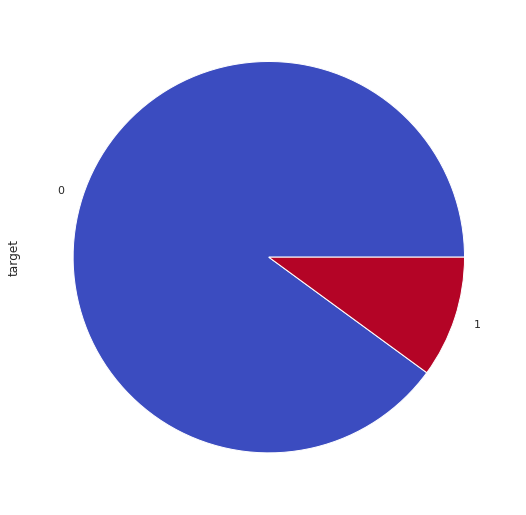

In [45]:
train['target'].value_counts().plot(kind="pie", figsize=(12,9), colormap="coolwarm")

Here we have a typical imbalanced dataset.

#### check for missing data

In [46]:
train.isna().sum().sum()

0

In [47]:
test.isna().sum().sum()

0

We have no NA values which is very nice!!

#### Splitting the numerical features

In [60]:
train.describe()
gc.collect();

In [48]:
numerical_features = train.columns[2:]

Distributions columns


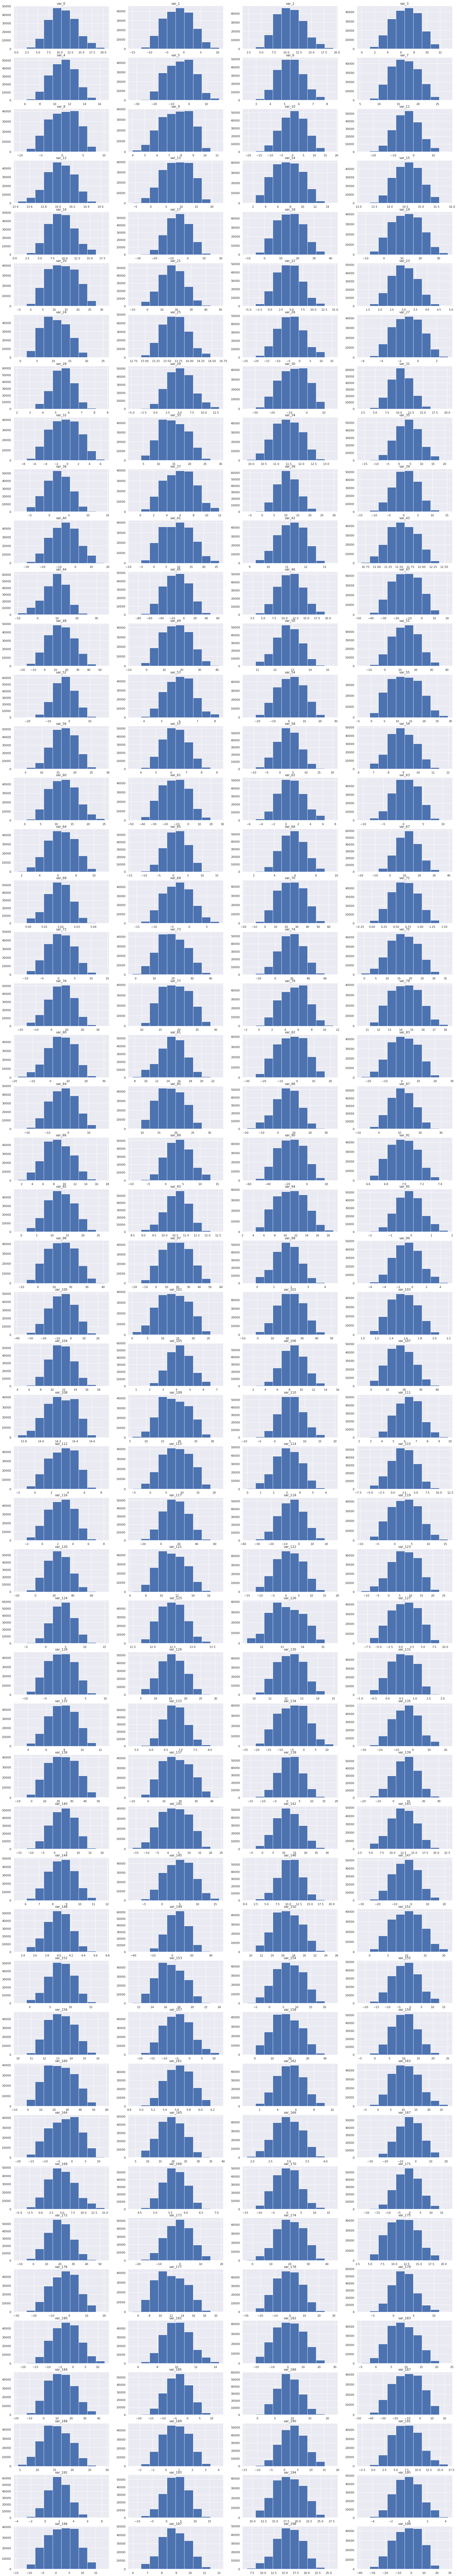

In [74]:
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train[col])
    plt.title(col)
gc.collect();

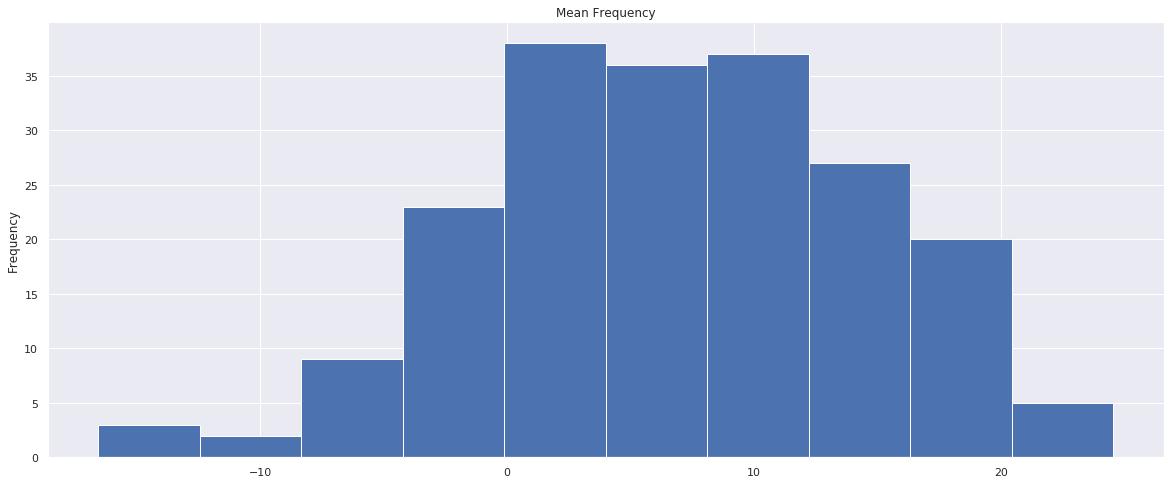

In [81]:
plt.figure(figsize=(20, 8))
train[numerical_features].mean().plot('hist');
plt.title('Mean Frequency');

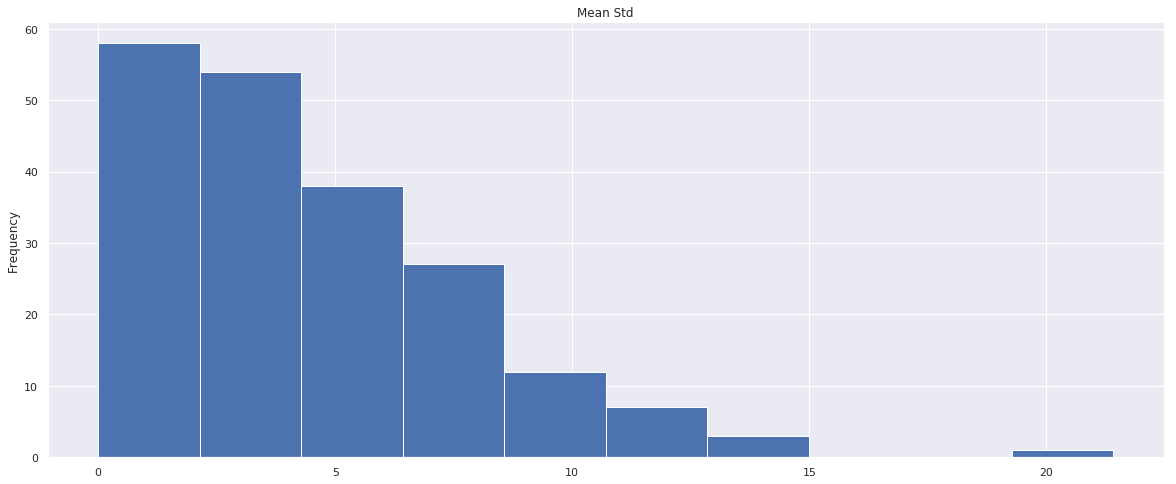

In [83]:
plt.figure(figsize=(20, 8))
train[numerical_features].std().plot('hist');
plt.title('Standard Deviation Frequency');

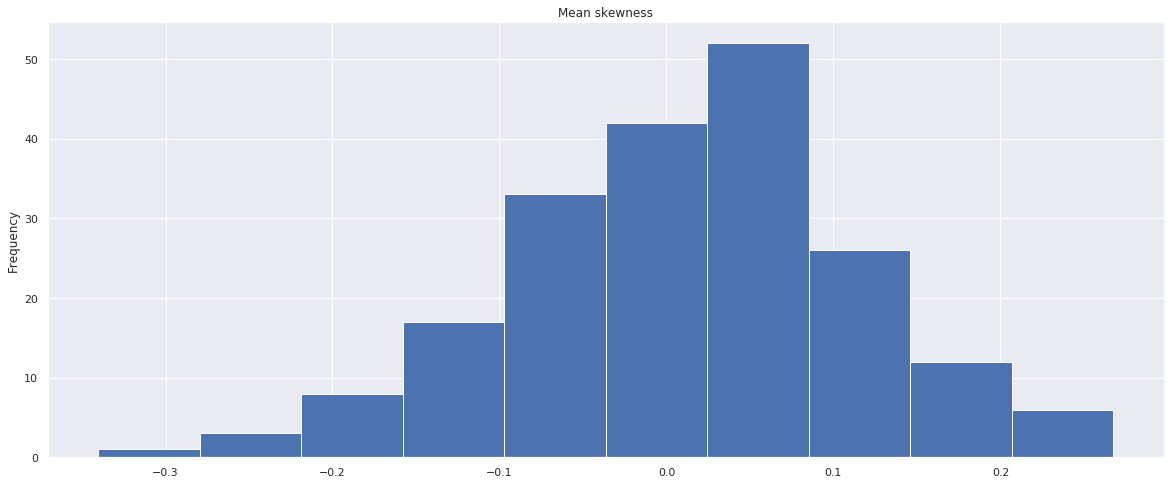

In [86]:
plt.figure(figsize=(20, 8))
train[numerical_features].skew().plot('hist');
plt.title('Skewness Frequency');

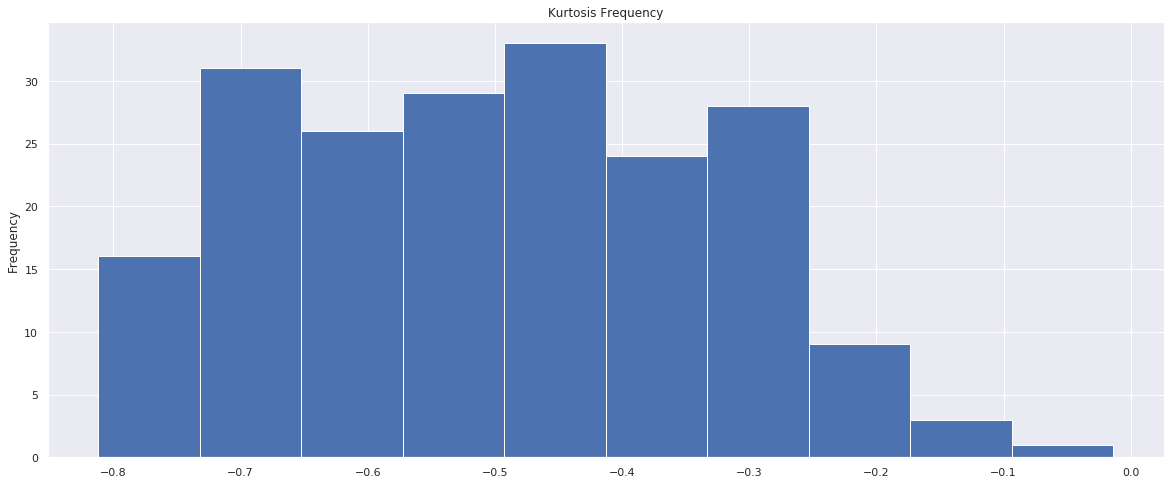

In [88]:
plt.figure(figsize=(20, 8))
train[numerical_features].kurt().plot('hist');
plt.title('Kurtosis Frequency');

<Figure size 3816x3816 with 0 Axes>

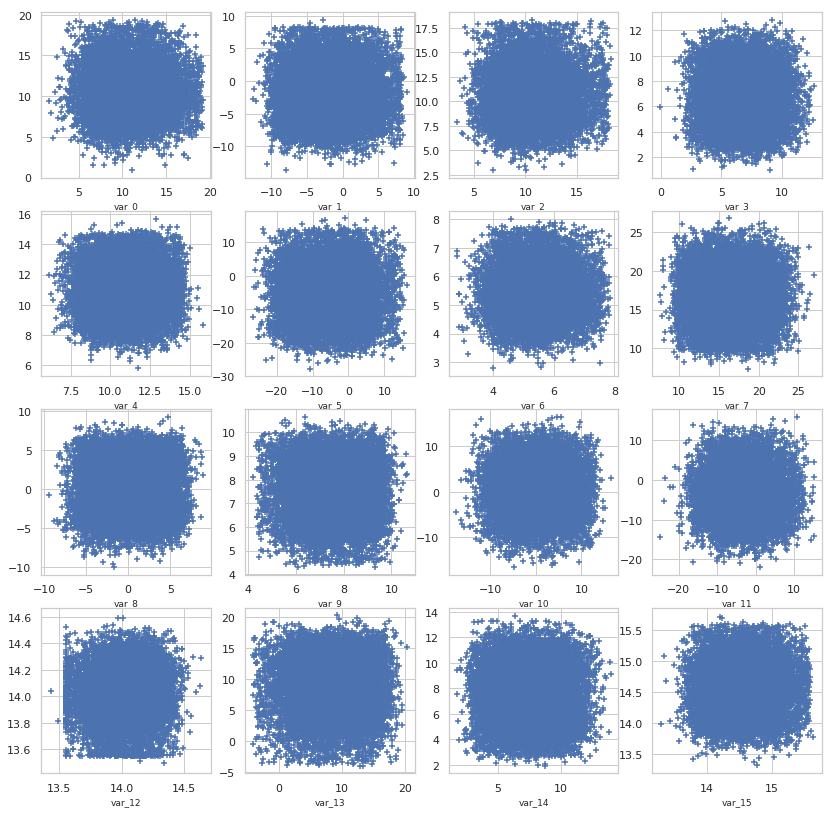

In [49]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(train[::20],test[::20], features)

### Univariate Analysis

### Bivariate Analysis
#### correlations between numerical data

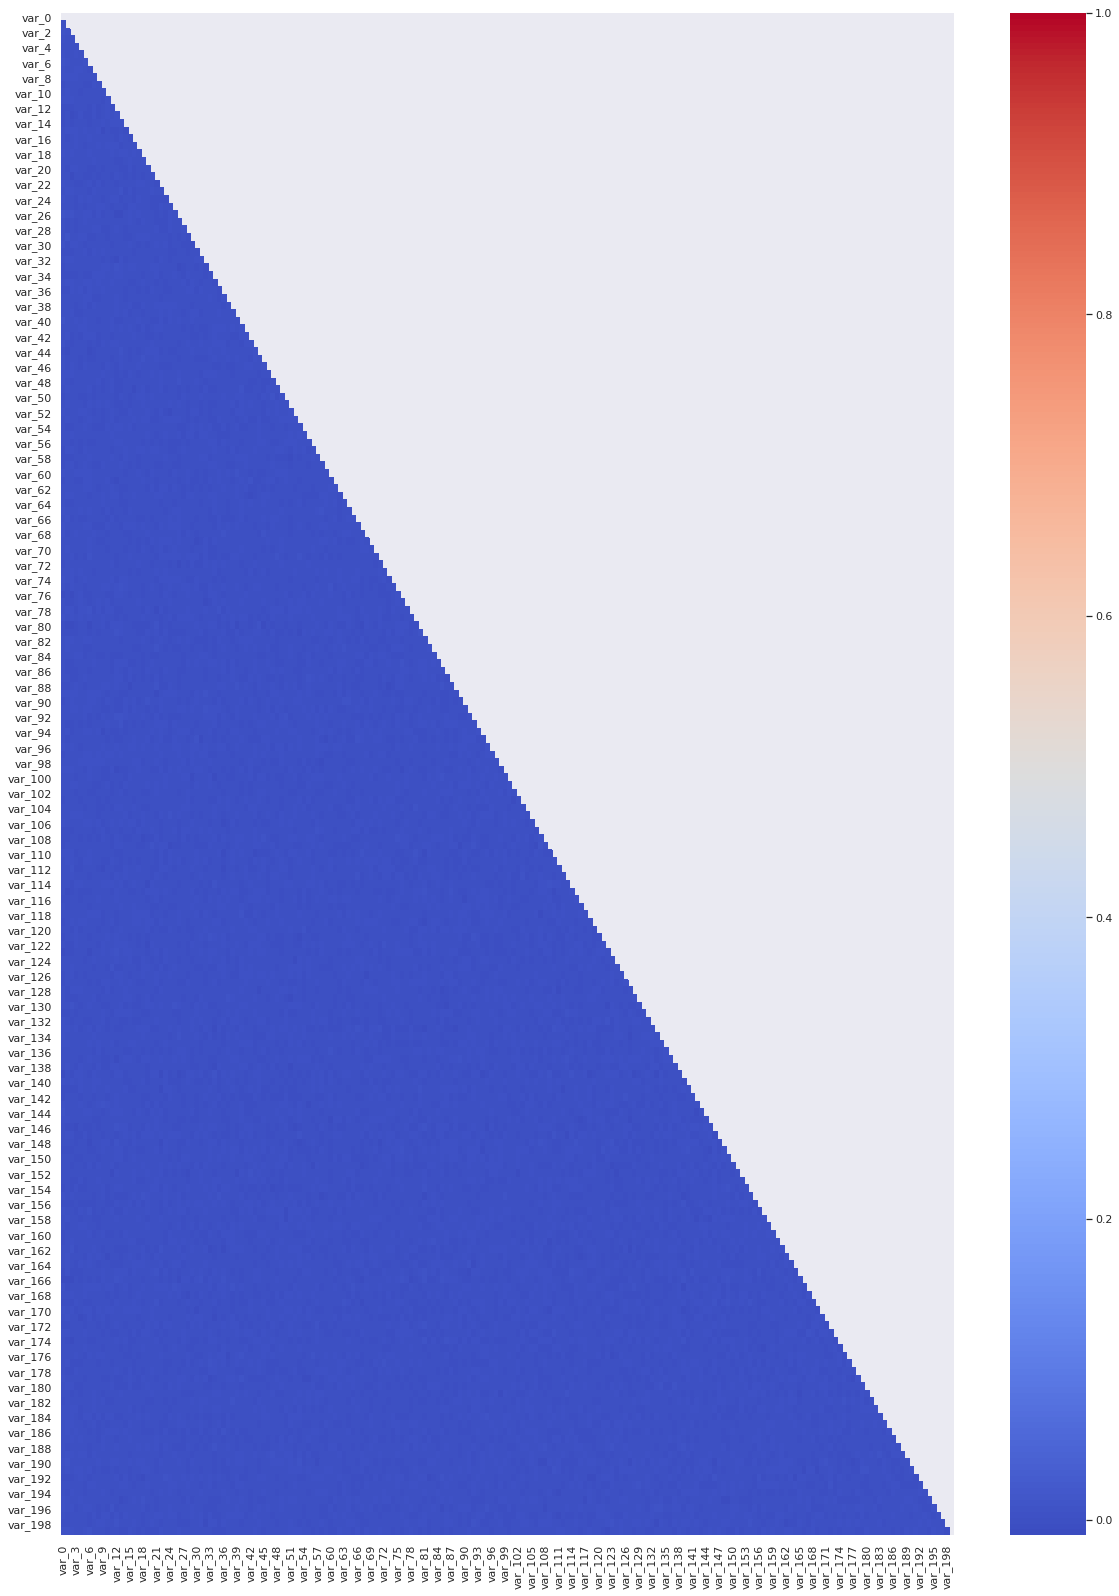

In [66]:
sns.set(rc={'figure.figsize':(20,28)})

# Compute the correlation matrix
corr = train[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            #annot=True, 
            #fmt=".2f", 
            cmap='coolwarm')

the figure above shows that most of the pearson correlations between the numerical data are close to zero, in fact is between 0 and 0.2. That means that most of the numerical data are almost uncorrelated between them.

#### Most correlated features:

In [52]:
s = corr.unstack().drop_duplicates()
so = s.sort_values(kind="quicksort")
so = so.drop_duplicates()

print("Top most highly positive correlated features:")
print(so[(so<1) & (so>0.5)].sort_values(ascending=False))

print()

print("Top most highly megative correlated features:")
print(so[(so> - 0.02)].sort_values(ascending=False))

Top most highly positive correlated features:
Series([], dtype: float64)

Top most highly megative correlated features:
var_0    var_0      1.000000
var_81   var_165    0.009714
         var_174    0.009490
var_183  var_189    0.009359
var_146  var_169    0.009071
var_122  var_132    0.008956
var_81   var_172    0.008936
var_12   var_146    0.008591
var_172  var_193    0.008163
var_6    var_157    0.008076
var_167  var_173    0.008045
var_26   var_48     0.007992
var_12   var_166    0.007929
var_121  var_149    0.007884
var_13   var_44     0.007843
var_137  var_180    0.007812
var_95   var_184    0.007804
var_71   var_133    0.007802
var_13   var_93     0.007796
var_18   var_155    0.007791
var_34   var_188    0.007765
var_103  var_113    0.007760
var_12   var_123    0.007708
var_115  var_148    0.007685
var_58   var_65     0.007675
var_110  var_133    0.007672
var_76   var_85     0.007635
         var_166    0.007619
var_107  var_109    0.007589
var_171  var_190    0.007570
          